In [30]:
# 실습 패키지
from sklearn.datasets import load_boston

# 기계학습 모델 구축 및 평가 패키지

import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정

plt.rc('font',family = 'Malgun Gothic')

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

import tensorflow as tf

import warnings
warnings.filterwarnings(action="ignore")

In [32]:
df = pd.read_csv("../pythonwork/ai/data/data1/heights.csv")
df

,height,weight
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
...,...,...
195,65.80,120.84
196,66.11,115.78
197,68.24,128.30
198,68.02,127.47


# 데이터 세트 나누기 X,y

In [33]:
X = pd.DataFrame(df, columns=['height'])
y = pd.DataFrame(df, columns=['weight'])

# Train / test 나누기

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2022)

#  선형회귀 모델 가정 확인하기

In [35]:
X_train =sm.add_constant(X_train)

model = sm.OLS(y_train,X_train, axis=1)

model_trained =model.fit()

### 4.1 확률 오차의 정규성확인

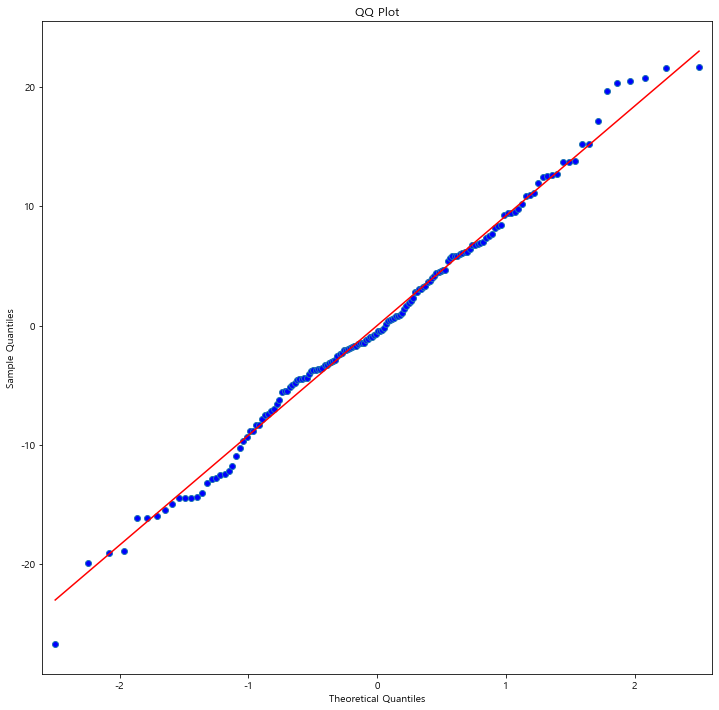

In [36]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] =False # 음수 폰트 깨짐방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line="s",color='#1f77b4',ax=ax)
ax.title.set_text('QQ Plot')

### 4.2 확률오차의 등분산성 확인

[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

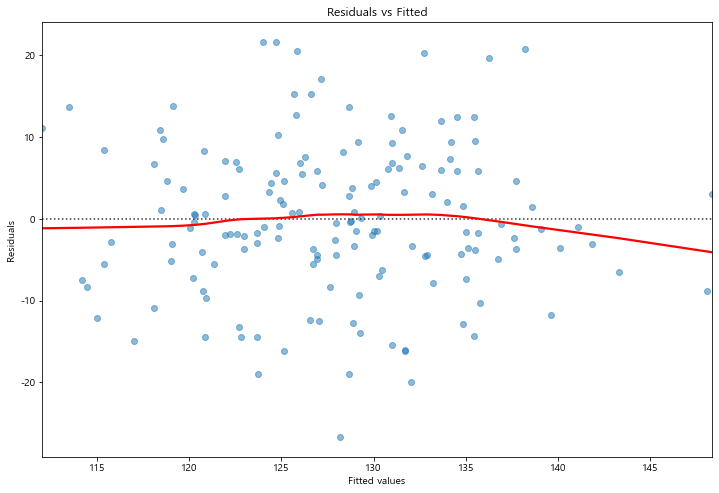

In [37]:
model_fitted_y = model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)


sns.residplot(model_fitted_y,y_train, data=X_train, lowess=True, scatter_kws={'alpha':0.5},
             line_kws={'color':'red'},ax=ax)

ax.title.set_text("Residuals vs Fitted")
ax.set(xlabel='Fitted values', ylabel='Residuals')

### 4.3 통계적으로 해석하기 

+ R-squared (결정계수,coefficient of determination): 모형의 성능
+ coef(회귀계수): X가 한단위 증가할때 Y의 변화량
+ P >[t] (p-values): 0.05(유의수준) 이하 일때 변수가 유의미

In [38]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     88.28
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           6.17e-17
Time:                        21:17:15   Log-Likelihood:                -582.06
No. Observations:                 160   AIC:                             1168.
Df Residuals:                     158   BIC:                             1174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -107.9970     25.118     -4.300      0.0

In [39]:
model = sm.OLS(y_train, X_train)

model_trained = model.fit()

print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     88.28
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           6.17e-17
Time:                        21:19:13   Log-Likelihood:                -582.06
No. Observations:                 160   AIC:                             1168.
Df Residuals:                     158   BIC:                             1174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -107.9970     25.118     -4.300      0.0

### 4.3 예측 : 미래의 반응변수 값 예측하기

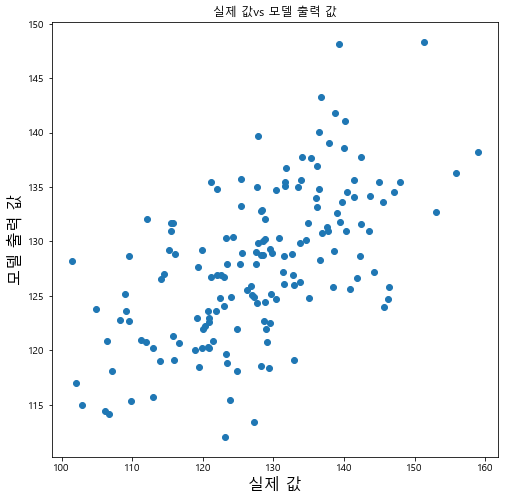

In [55]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(8,8))
plt.title('실제 값vs 모델 출력 값')
plt.scatter(y_train,y_train_pred)
plt.plot([],[], ls="--",c='red')
plt.xlabel('실제 값',size=16)
plt.ylabel('모델 출력 값',size=16)
plt.xlim()
plt.ylim()
plt.show()

In [41]:
X_test = sm.add_constant(X_test)

In [43]:
y_test_pred = model_trained.predict(X_test)

y_test_pred.head(5)

58     122.196386
22     112.206076
184    121.745434
131    139.089721
98     123.618617
dtype: float64

### 4.3.1 Mean Squared Error (평균 제곱 오차)

In [50]:
print(mean_squared_error(y_test, y_test_pred))

153.86965606916937


### 4.3.2 Root Mean Squared Error (제곱급 평균 제곱 오차)

In [51]:
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

12.404420827639207


### 4.3.3 Mean Absolute Error (평균 절대 오차)

In [46]:
print(mean_absolute_error(y_test, y_test_pred))

10.026921476863796


### 4.3.4 Mean Absolute Percentage Error (평균 절대 백분율 오차)

In [52]:
def mean_absolute_percentage_error(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

print(mean_absolute_percentage_error(y_test,y_test_pred))

9.911743385605616


### 4.3.5 squared(결정계수)

In [53]:
print(r2_score(y_test,y_test_pred))

# 0.4이상이면 적합함.

# 즉 적합하지않은 모델임.

0.12034832543864582
